In [5]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import yfinance as yf

import matplotlib.pyplot as plt
import plotly.express as px
import pytz  # Make sure to import pytz for timezone handling
import seaborn as sns

from sklearn.preprocessing import StandardScaler, Normalizer

import warnings

In [6]:
warnings.filterwarnings("ignore")
pd.options.mode.copy_on_write = True

In [7]:
sp500_etf_dict = {
    'Consumer_Discretionary': 'XLY'
    ,'Consumer_Staples': 'XLP'
    ,'Energy': 'XLE'
    ,'Financial': 'XLF'
    ,'Health Care': 'XLV'
    ,'Industrial': 'XLI'
    ,'Material': 'XLB'
    ,'Technology': 'XLK'
    ,'Utilities': 'XLU'
    ,'SP_500': 'SPY'
}

You entered search start date: 2024-01-01, 
      You entered search end date:  2024-05-15


[*********************100%%**********************]  10 of 10 completed


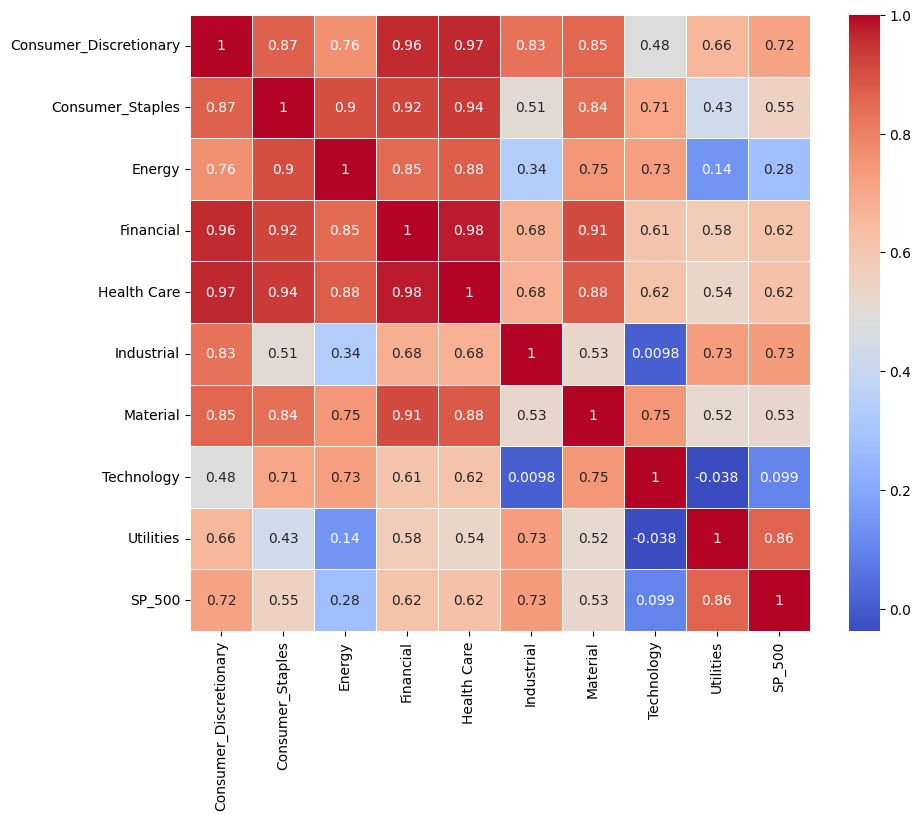

In [8]:
search_start_date_str = input("search start date, enter date format (YYYY-MM-DD): ")
search_end_date_str = input("search end date, enter date format (YYYY-MM-DD): ")

print(f'''You entered search start date: {search_start_date_str}, 
      You entered search end date:  {search_end_date_str}''')


search_start_date_dt = datetime.strptime(search_start_date_str, "%Y-%m-%d").replace(tzinfo=pytz.UTC)
search_end_date_dt = datetime.strptime(search_end_date_str, "%Y-%m-%d").replace(tzinfo=pytz.UTC)

# Fetch historical data for these ETFs
data = yf.download(
    list(sp500_etf_dict.values())
    ,start=search_start_date_str
    ,end=search_end_date_str)['Adj Close']


# Initialize the StandardScaler
std_scaler = StandardScaler()
norm_scaler = Normalizer()

scaled_data = std_scaler.fit_transform(data)
df_scaled = pd.DataFrame(scaled_data, columns=sp500_etf_dict.keys(), index=data.index)
# Calculate the correlation matrix
correlation_matrix = df_scaled.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [42]:
# # Set pandas to display all rows and columns (use None to display all)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# data